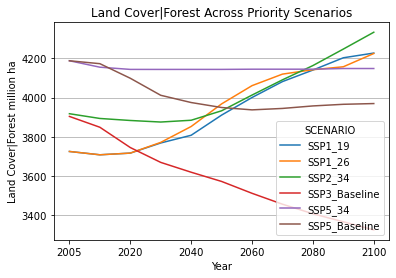

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

%matplotlib inline
Selection = 'Land Cover|Forest' # choose the variable you want and enter it as a string
Region ='World'   #choose the region you want and also enter that as a string
data = pd.read_csv(r"C:\Users\conno\OneDrive\Documents\SSP data\SSP_IAM_V2_201811.csv")
variable_sort = data.loc[data.VARIABLE == Selection]          #filters dataset by the selected variable
region_sort = variable_sort.loc[variable_sort.REGION == Region] #then filters by the selected region


SSP1NormalModel = region_sort.loc[region_sort.MODEL == 'IMAGE']
SSP2NormalModel = region_sort.loc[region_sort.MODEL == 'MESSAGE_GLOBIOM']
SSP3NormalModel = region_sort.loc[region_sort.MODEL == 'AIM/CGE']           #these produce separate dataframes for each of the standard models for each SSP
SSP4NormalModel = region_sort.loc[region_sort.MODEL == 'GCAM']
SSP5NormalModel = region_sort.loc[region_sort.MODEL == 'REMIND_MAGPIE']

SSP1_19 = SSP1NormalModel.loc[SSP1NormalModel.SCENARIO == 'SSP1_19']
SSP1_26 = SSP1NormalModel.loc[SSP1NormalModel.SCENARIO == 'SSP1_26']
SSP2_34 = SSP2NormalModel.loc[SSP2NormalModel.SCENARIO == 'SSP2_34']
SSP3_70 = SSP3NormalModel.loc[SSP3NormalModel.SCENARIO == 'SSP3_Baseline']
SSP4_34 = SSP4NormalModel.loc[SSP4NormalModel.SCENARIO == 'SSP4_34']          #these create further dataframes for each of the priority scenarios from the standard model dataframes
SSP4_60 = SSP4NormalModel.loc[SSP4NormalModel.SCENARIO == 'SSP4_60']
SSP5_34 = SSP5NormalModel.loc[SSP5NormalModel.SCENARIO == 'SSP5_34']
SSP5_85 = SSP5NormalModel.loc[SSP5NormalModel.SCENARIO == 'SSP5_Baseline']

combined_list = pd.concat([SSP1_19, SSP1_26, SSP2_34, SSP3_70, SSP4_34, SSP4_60, SSP5_34, SSP5_85], ignore_index =True) #combines the above into 1 list
combined_dataset = DataFrame(combined_list) #turns the list into a dataframe

streamlining = combined_dataset.drop(labels =['MODEL', 'REGION', 'VARIABLE', 'UNIT'], axis=1) #gets shot of the superfluous columns


set_the_index = streamlining.set_index('SCENARIO') #turns the scenarios into the index column, need to do this to convert the data back to floats
convert_to_f = set_the_index.astype(float) #need to turn all the data back into floats


ready_to_plot = convert_to_f.T #transposes the data so I can plot it
unit_for_label = combined_dataset.iat[0,4] #this just finds what the unit is called as a string so I can use it to label the figure.

ready_to_plot.plot()
plt.xlabel ('Year')
plt.ylabel (Selection + ' ' + unit_for_label)
plt.title (Selection + ' Across Priority Scenarios')
plt.grid(b=True, axis ='y')




